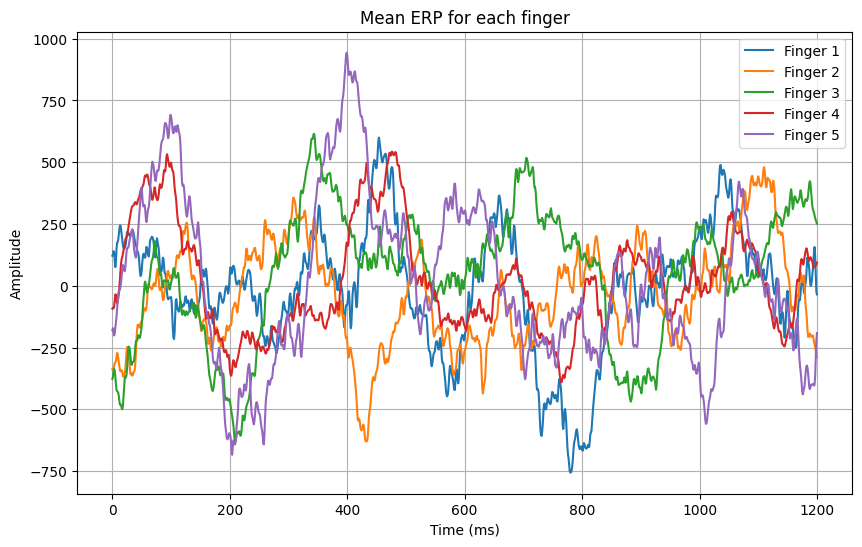

[[ 121.5859375   128.078125    140.1796875  ...   42.8125
   -23.765625    -34.859375  ]
 [-337.725      -338.28333333 -334.625      ... -263.21666667
  -278.08333333 -289.5       ]
 [-377.33333333 -367.99166667 -346.64166667 ...  265.88333333
   258.375       251.18333333]
 [ -92.44736842  -89.54210526  -91.61578947 ...   81.10526316
    87.2          93.63684211]
 [-180.35135135 -171.59459459 -185.48648649 ... -294.05405405
  -222.86486486 -191.21621622]]


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

'''first, i will load my csv files:

events_file_orderd => contains 3 columns:
left - start time of the movement of the finger
middle - inversion point - high (peak)
right - the number of the finger from 1 to 5

brain_data_channel_one => contain 1 column of time series of brain signal 

it's important to mention that both the files dont contain titles before the columns, so i wrote: header = None so that the reading will use the first cell as a value and not title
i will refer the collumnes by their idx : from 0 to 2 (n-1)'''

trial_points = pd.read_csv(r"C:\Users\Shir Zivav\Documents\PythonVSC\mini_project_2_data\events_file_ordered.csv",header = None)
ecog_data = pd.read_csv(r"C:\Users\Shir Zivav\Documents\PythonVSC\mini_project_2_data\brain_data_channel_one.csv", header = None)

def calc_mean_erp(trial_points,ecog_data):
    '''This function gets as input 2 variables - the 2 csv files.
    for the file - events_file_ordered => the function will ensure that all the variables are of type int.
    the function will return a matrix in the size of 5x1201 of the mean ERP for each finger.
    the function will also plot the average brain response for each finger'''
    
    # now i used the function- astype - in order to convert all the values in the csv file - events_file_ordered - to int
    trial_points = trial_points.astype(int) 

    # using the iloc function in order to extract the data from the csv file. 
    # : represent to take all the raws, 0 - to take the column in index 0
    # to_numpy - convert the data to a numpy array to make mathematical operations. 
    brain_signals = ecog_data.iloc[:,0].to_numpy() 

    # indices before the start
    before_start = 200 

    finger_data = {} # initializing a dictionary 
    for finger in range(1,6): # going throug 5 fingers from 1 to 5
        finger_data[finger] = [] #creating an empty list as a value for each finger - key
    
    # going through each row of the file trial_points with - iterrow
    for _, row in trial_points.iterrows():
        start_idx = row[0] # the first column - the starting index of the movement
        finger = row[2] # third column - finger number 
        
        # extract the 1201 signal sample window
        if start_idx >= before_start and start_idx + 1000 < len(brain_signals): # cheking if the size of the sample is correct
            slice_data = brain_signals[start_idx - before_start : start_idx + 1001] # creating a slice of the signal data in the size of 1201: 200 samples before + 1 of start + 1000 after
            finger_data[finger].append(slice_data) # appending the slice of data to the list of the corresponding finger in the dictionary
    
    # in that point i want to create a matrix in the wanted shape. i will create a matrix filled with the argumantes of zeros, and later assigned them to the correct values.
    # at the end, the function will return this matrix into a variable named - fingers_erp_mean 
    # each row of the matrix - represent one finger
    # time 1201 = 200 before + 1 start + 1000 after
    fingers_erp_matrix = np.zeros((5,1201))
    
    # calculate the mean ERP => to the matrix
    for finger in range(1,6):
        if finger_data[finger]: # check if there is data for this finger
            fingers_erp_matrix[finger - 1] = np.mean(finger_data[finger], axis=0) # finger-1 because the rows indices are 0-4 and fingers are 1-5. assign the mean calculate from the dictionary for this finger to the matrix
    
    plt.figure(figsize = (10,6))
    for finger in range(1,6):
        plt.plot(fingers_erp_matrix[finger - 1], label=f'Finger {finger}') # ploting the mean erp from the matrix to the correxponding finger
    
    plt.title('Mean ERP for each finger')
    plt.xlabel('Time (ms)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True)
    plt.show()

    return fingers_erp_matrix


fingers_erp_mean = calc_mean_erp(trial_points, ecog_data) #calling to the function
print(fingers_erp_mean) # printing the matrix